<a href="https://colab.research.google.com/github/MartinPG22/Tecnicas-Aprendizaje-Automatico/blob/main/P1_EDA_100472279_100472236.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de la Producción de Energía Eólica**


---


G1:

    Martín Portugal González: 100472279

    Alba Vidales Casado: 100472236

Enlace repositorio: https://github.com/albavidales/Aprendizaje-Automatico-p1-100472279-100472236.git


---




## 1. EDA ##


En primer lugar, se llevará a cabo el análisis exploratorio de datos, que será la técnica inicial que utilizaremos para comprender la naturaleza y el potencial de nuestros datos. De esta manera, tendremos una visión inicial que orientará decisiones y estrategias futuras.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

Para comenzar con el análisis, cargaremos los datos en un DataFrame y mostraremos las primeras 10 filas, para poder visualizar de forma rápida la estructura de nuestro dataset.

In [ ]:
nombre_archivo = "wind_ava.csv.gz"
dataset = pd.read_csv(nombre_archivo, sep = ',')
dataset.head(10)

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
5,2005-01-04 00:00:00,232.30,2.529670e+06,2.521699e+06,2.513729e+06,2.505759e+06,2.497784e+06,2.525793e+06,2.517538e+06,2.509288e+06,...,5.325681,5.334162,5.342145,5.350627,5.358609,5.231884,5.236375,5.240865,5.245854,5.250344
6,2005-01-04 06:00:00,329.95,2.527316e+06,2.519341e+06,2.511366e+06,2.503387e+06,2.495412e+06,2.523484e+06,2.515225e+06,2.506965e+06,...,4.631687,4.620711,4.609236,4.598259,4.587283,4.554355,4.542381,4.530407,4.518433,4.506459
7,2005-01-04 12:00:00,960.51,2.528694e+06,2.520746e+06,2.512803e+06,2.504860e+06,2.496912e+06,2.524907e+06,2.516680e+06,2.508447e+06,...,4.030492,3.889298,3.748603,3.607410,3.466216,3.909754,3.771554,3.633853,3.496151,3.357951
8,2005-01-04 18:00:00,194.62,2.527225e+06,2.519345e+06,2.511461e+06,2.503581e+06,2.495701e+06,2.523484e+06,2.515320e+06,2.507155e+06,...,4.784854,4.630190,4.476025,4.321859,4.167195,4.636676,4.485005,4.333334,4.181664,4.029993
9,2005-01-05 00:00:00,358.51,2.529087e+06,2.521216e+06,2.513350e+06,2.505479e+06,2.497613e+06,2.525368e+06,2.517213e+06,2.509062e+06,...,4.525916,4.381230,4.236046,4.091360,3.946674,4.318367,4.178171,4.037975,3.897281,3.757085


###Selección preliminar de columnas <br>
Tal y como nos indica el enunciado nos quedamos con las columnas que acaben en .13 así como la energía y el datetime.
Antes de continuar, se realiza una limpieza de los datos que no vamos a utilizar, y en este caso solo utilizaremos aquellos datos que hacen referencia a la localización de Sotavento (aquellos atributos que terminan en 13).

In [ ]:
columnas_drop= [col for col in dataset.columns if not (col.endswith('.13') or col == "datetime" or col == "energy")]
dataset = dataset.drop(columns=columnas_drop)
dataset.head(5)

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


### Análisis detallado de los datos
A continuación, iremos inspeccionando todos los datos con mayor detenimiento. Para ello, verificaremos la información que guarda nuestro Dataset, observando que no disponemos de ningún dato categórico, solo tendremos datos numéricos cuyo rango irá variando en función de la variable.

In [ ]:
tipos_datos = dataset.info
print(tipos_datos)

<bound method DataFrame.info of                  datetime   energy    p54.162.13  p55.162.13    cape.13  \
0     2005-01-02 18:00:00   402.71  2.510824e+06    9.186295  13.527577   
1     2005-01-03 00:00:00   696.80  2.513173e+06    8.849569   6.896412   
2     2005-01-03 06:00:00  1591.15  2.509627e+06    7.924080   4.774439   
3     2005-01-03 12:00:00  1338.62  2.510571e+06    6.922709   0.000000   
4     2005-01-03 18:00:00   562.50  2.505664e+06    6.646282   0.000000   
...                   ...      ...           ...         ...        ...   
4743  2009-12-30 06:00:00  1280.13  2.385772e+06   14.413342  24.971074   
4744  2009-12-30 12:00:00   855.00  2.385708e+06   12.802883  60.248874   
4745  2009-12-30 18:00:00   117.06  2.379049e+06   10.915997   3.145067   
4746  2009-12-31 12:00:00   516.96  2.371697e+06   13.048144  12.580268   
4747  2009-12-31 18:00:00   867.07  2.369547e+06    9.172745   8.487892   

        p59.162.13  lai_lv.13  lai_hv.13   u10n.13   v10n.13  ...  

De la misma manera, con las siguientes líneas de código comprobaremos si tenemos valores nulos que se puedan descartar. Como podemos ver a continuación, esto no sucede en nuestro dataset.

In [ ]:
valores_nulos = dataset.isnull().any()
print(valores_nulos)

datetime      False
energy        False
p54.162.13    False
p55.162.13    False
cape.13       False
p59.162.13    False
lai_lv.13     False
lai_hv.13     False
u10n.13       False
v10n.13       False
sp.13         False
stl1.13       False
u10.13        False
v10.13        False
t2m.13        False
stl2.13       False
stl3.13       False
iews.13       False
inss.13       False
stl4.13       False
fsr.13        False
flsr.13       False
u100.13       False
v100.13       False
dtype: bool


También resulta relevante conocer atributos que se mantengan con valores constantes, en tal caso, también podríamos considerar descartar dichas variables.

In [ ]:
# Calcular el número de valores únicos en cada columna
valores_unicos_por_columna = dataset.nunique()

# Identificar columnas con valores constantes (un solo valor único)
columnas_constantes = valores_unicos_por_columna[valores_unicos_por_columna == 1].index.tolist()

# Mostrar las columnas constantes
print("Columnas constantes:")
print(columnas_constantes)

Columnas constantes:
[]


Además, resulta interesante comprobar si alguno de los atributos de nuestro Dataset contiene valores igual a 0, de manera que pueda tener un impacto en el estudio debido a su significado en el espacio de instancias.

In [ ]:
# Crear un DataFrame a partir de la variable 'datos'
df = pd.DataFrame(dataset)

# Crear un diccionario para almacenar los resultados
ceros = {}

# Contar los valores iguales a cero en cada columna y guardarlos en el diccionario
for columna in df.columns:
    cuenta = np.sum(df[columna] == 0)
    ceros[columna] = cuenta

# Mostrar el diccionario con los contadores de ceros
for columna, cuenta in ceros.items():
    print(f"'{columna}': {cuenta}")

'datetime': 0
'energy': 0
'p54.162.13': 0
'p55.162.13': 0
'cape.13': 1492
'p59.162.13': 0
'lai_lv.13': 0
'lai_hv.13': 0
'u10n.13': 0
'v10n.13': 0
'sp.13': 0
'stl1.13': 0
'u10.13': 0
'v10.13': 0
't2m.13': 0
'stl2.13': 0
'stl3.13': 0
'iews.13': 0
'inss.13': 0
'stl4.13': 0
'fsr.13': 0
'flsr.13': 0
'u100.13': 0
'v100.13': 0


Vemos como el atributo *cape* tiene una gran cantidad de datos en los que es igual a 0. Dado que es una porción pequeña de datos, y además, dicha variable representa la energía disponible en la atmósfera que puede desencadenar procesos de convección (tormentas), no se ha tomado ninguna decisión al respecto.


Por último, en este apartado se han obtenido estadísticas descriptivas para cada columna del conjunto de datos. Estas estadísticas incluyen el número de filas, la media, la desviación estándar, los valores mínimo y máximo, así como los cuartiles (25%, 50% y 75%) de cada atributo numérico en el DataFrame.

In [ ]:
dataset.describe()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,...,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,...,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,...,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,...,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,...,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395
max,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,...,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


Este resumen estadístico proporciona una visión general de la distribución y la dispersión de los datos en cada atributo, lo cuál puede ser útil para identificar tendencias, detectar valores atípicos y comprender la variabilidad de los datos en el conjunto de datos.

### Gráficos
Para finalizar con el EDA, en este apartado podremos encontrar una serie de gráficos que nos ayudarán a estudiar los datos y las relaciones existentes entre los atributos con un mayor nivel de detalle, y así sacar nuevas conclusiones.

Comenzaremos estudiando la variable *cape*, de la cuál ya observamos que tomaba en numerosas ocasiones el valor 0. Como podemos ver en el gráfico, esto se podría deber a que suele tener valores bastante bajos, la mayor parte de ellos comprendidos entre el 0 y el 500.

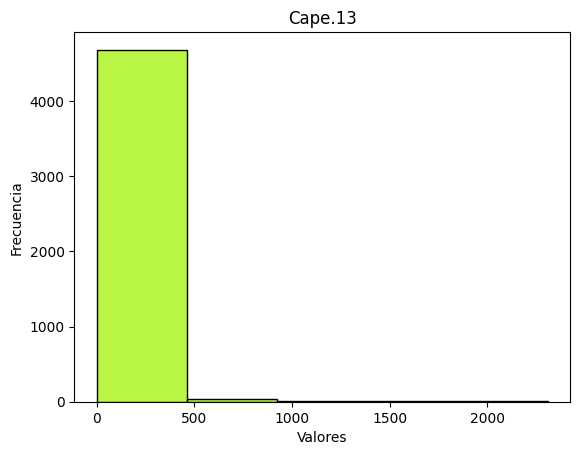

In [ ]:
# Crear histograma con Seaborn
sns.histplot(dataset['cape.13'], bins=5, kde=False, color = '#a0f207')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Cape.13')
plt.show()

Por otra parte, hemos generado un *heatmap* para visualizar las relaciones entre los diferentes atributos. Este gráfico nos permite identificar qué atributos están más relacionados entre sí, lo que nos proporciona información para profundizar en su estudio y comprender mejor su impacto en el modelo.

De esta manera, podemos identificar fácilmente las relaciones más fuertes o significativas entre los diferentes atributos.

Antes de generar el *heapmap* realizamos una copia del *dataset* sin la variable *datetime*, pues nos generaba problemas al crearlo

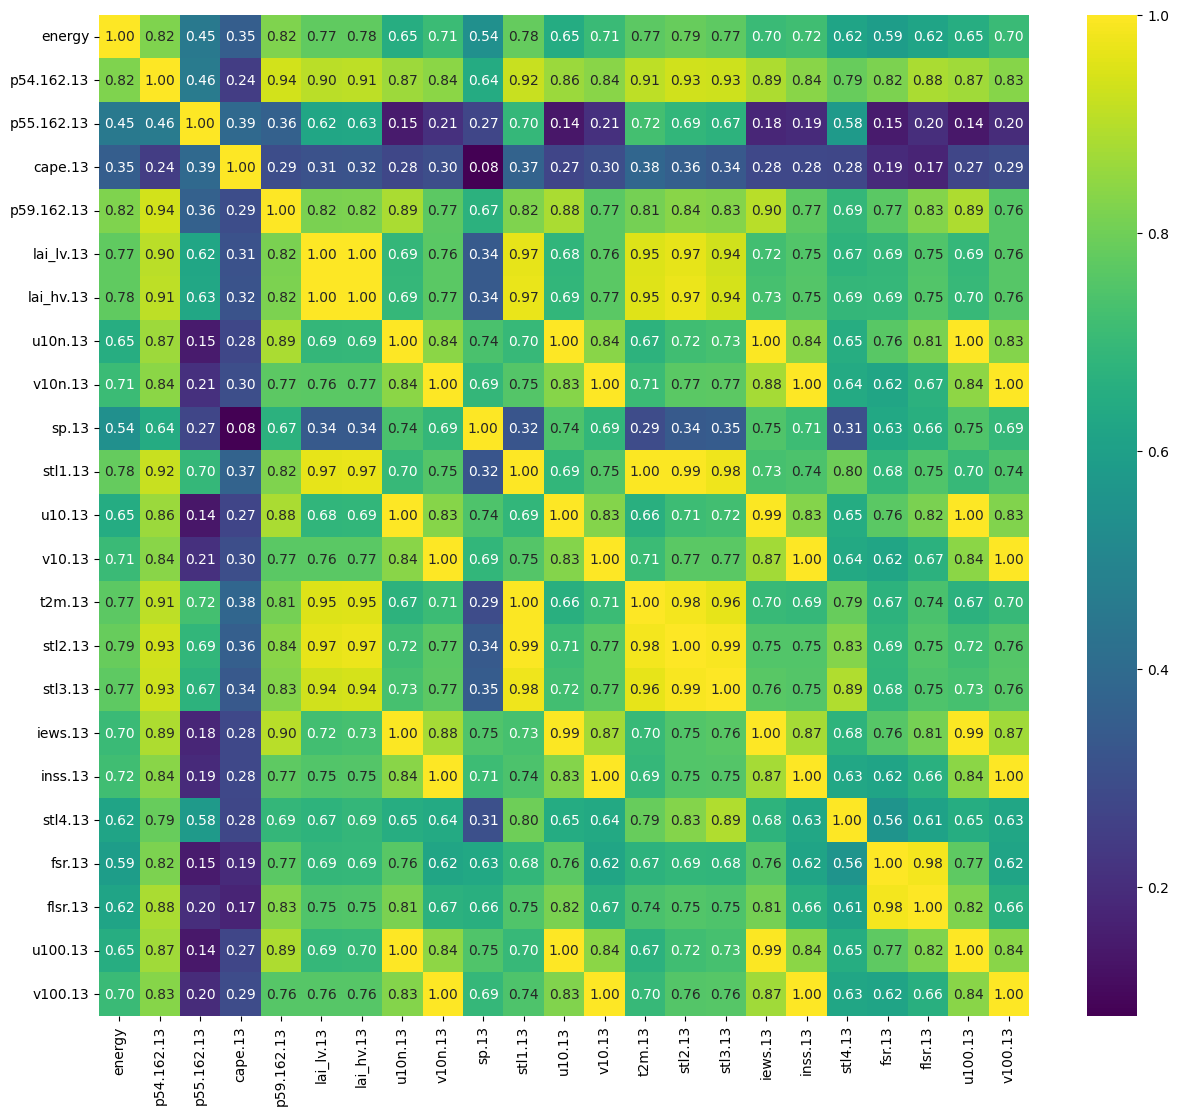

In [ ]:
# Copia del DataFrame sin modificar el original
dataset_copy = dataset.copy()

# Calcula las correlaciones excluyendo la columna datetime
correlaciones_sin_datetime = dataset_copy.drop(columns=['datetime']).corr()

# Crea el gráfico de calor
plt.figure(figsize=(15, 13))
plot = sns.heatmap(correlaciones_sin_datetime.corr().abs(), fmt=".2f", annot=True, cmap="viridis")

Tras realizar el *heatmap* con las correlaciones de las distintas variables, observamos que hay algunas con una correlación muy alta. A continuación, exploraremos más a fondo estas relaciones para comprender mejor su naturaleza y su posible impacto en nuestro modelo.

Aquellas variables que tienen poca correlación no se eliminan, pues podrían estar correlacionadas con otros atributos diferentes, o podrían tener un valor informativo.

En primer lugar, hemos generado un gráfico para observar la alta correlación entre las variables *stl2.13* (temperatura del terreno en el nivel 2), *stl3.13* (temperatura del terreno en el nivel 3) y *t2m.13* (la temperatura a 2 metros). Cabe destacar que para representar la variable *stl3.13* se han utilizado colores (solo podemos representar dos de ellas en el gráfico).

Dado que todas estas variables están relacionadas con la temperatura atmosférica en diferentes niveles o altitudes, es esperable que presenten una correlación alta entre sí.

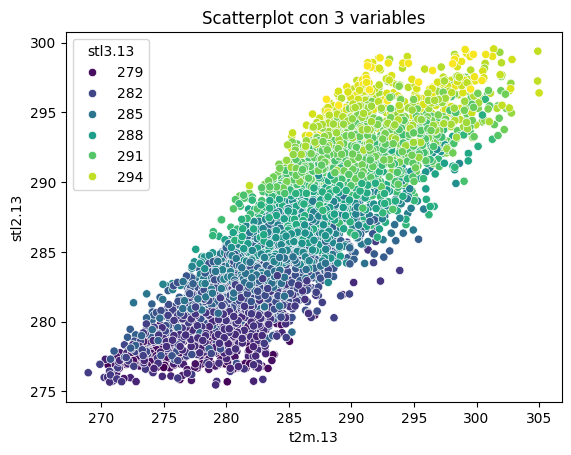

In [ ]:
sns.scatterplot(x=dataset['t2m.13'], y=dataset['stl2.13'], hue=dataset['stl3.13'], data=df, palette='viridis')
plt.title('Scatterplot con 3 variables')
plt.xlabel('t2m.13')
plt.ylabel('stl2.13')
plt.show()

Por otro lado, vemos que *lai_lv.13* y *lai_lv.13*, variables que se refieren al Índice de Área Foliar para la vegetación alta y la vegetación baja, estan altamente correlacionadas, y además tienen correlaciones similares con el resto de variables. Realizamos un gráfico y podemos visualizar de forma rápida que prácticamente aportan lo mismo a nuestro Dataset. Debido a lo anterior, tomamos la decisión de eliminar *lai_lv.13*.

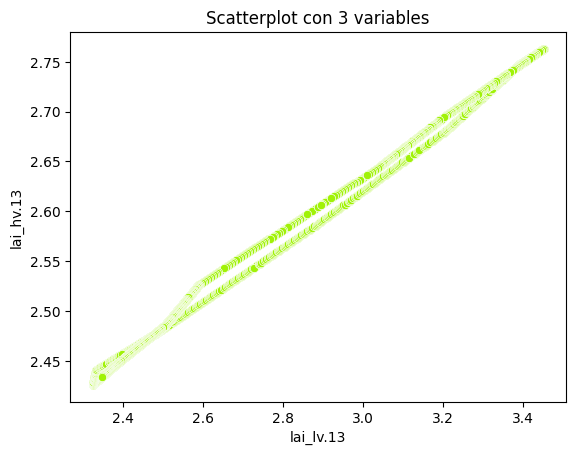

In [ ]:
sns.scatterplot(x=dataset['lai_lv.13'], y=dataset['lai_hv.13'], data=df, color = '#a0f207')
plt.title('Scatterplot con 3 variables')
plt.xlabel('lai_lv.13')
plt.ylabel('lai_hv.13')
plt.show()

In [ ]:
del dataset['lai_lv.13']

También observamos como los atributos *u10* (componente "u" del viento neutral a una altura de 10 metros) y *u100* (componente "u" del viento neutral a una altura de 100 metros) estan altamente correlacionados, por tanto generamos el siguiente gráfico:

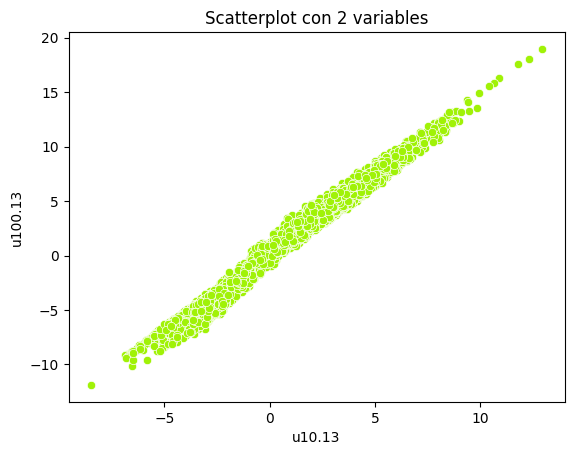

In [ ]:
sns.scatterplot(x=dataset['u10.13'], y=dataset['u100.13'], data=df, color = '#a0f207')
plt.title('Scatterplot con 2 variables')
plt.xlabel('u10.13')
plt.ylabel('u100.13')
plt.show()

Debido a la alta correlación que mantienen, consideramos que es posible eliminar una de las dos variables. Para elegir cuál de ellas será eliminada, hemos recurrido a la información que nos aporta el problema que estamos abordando, seleccionando así *u100* como la que más impacto tiene debido a la altura de los aerogeneradores.

In [ ]:
del dataset['u10.13']

Sucedía exactamente lo mismo con las variables *v10* (componente "v" del viento neutral a una altura de 10 metros) y *v100* (componente "v" del viento neutral a una altura de 100 metros). Obtenemos el siguiente gráfico:

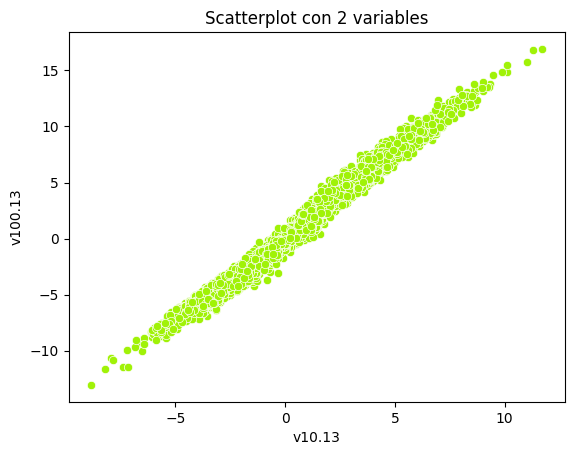

In [ ]:
sns.scatterplot(x=dataset['v10.13'], y=dataset['v100.13'], data=df, color = '#a0f207')
plt.title('Scatterplot con 2 variables')
plt.xlabel('v10.13')
plt.ylabel('v100.13')
plt.show()

Igual que antes, y debido a la altura de los aerogeneradores, hemos decidido eliminar la variable *v10*.

In [ ]:
del dataset['v10.13']

Para finalizar con este apartado, pensamos que sería interesante poder apreciar la serie temporal de nuestros datos en forma de gráfico. Obtuvimos lo siguiente:

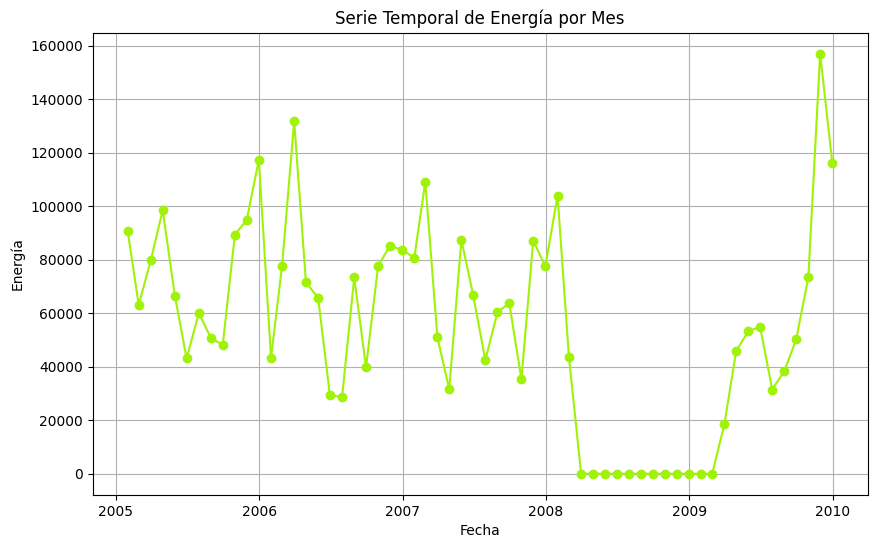

In [ ]:
dataset['Fecha'] = pd.to_datetime(dataset['datetime'])
dataset['Año'] = dataset['Fecha'].dt.year
dataset['Mes'] = dataset['Fecha'].dt.month
dataset.set_index('Fecha', inplace=True)

# Agrupa los datos por mes y calcula la suma de energía para cada mes
data_por_mes = dataset.resample('M').sum()

# Graficar la serie temporal por meses
plt.figure(figsize=(10, 6))
plt.plot(data_por_mes.index, data_por_mes['energy'], marker='o', color = '#a0f207')
plt.title('Serie Temporal de Energía por Mes')
plt.xlabel('Fecha')
plt.ylabel('Energía')
plt.grid(True)
plt.show()

Gracias al análisis anterior, hemos observado que hay una falta significativa de datos durante el año 2008 y parte del 2009. Este aspecto es crucial al considerar la preparación de nuestros datos para el entrenamiento (puede sesgar nuestro modelo si no se maneja adecuadamente), ya que debemos evitar incluir estos años en la partición de entrenamiento para garantizar que nuestra muestra de datos sea representativa.

In [ ]:
del dataset['datetime']

## 2. Selección de métricas de evaluación ##


Tras haber analizado los datos, hemos llegado a la conclusión de que para la evaluación outer, implementaremos la técnica de train-test. Esta decisión se basa en varias razones fundamentales. Primero, la división de los datos en conjuntos de entrenamiento y prueba nos permite evaluar el rendimiento del modelo en datos independientes, proporcionando así una evaluación más realista. Además, al reservar una porción de los datos para la prueba, podemos controlar el sobreajuste del modelo a los datos de entrenamiento y garantizar su capacidad de generalización a nuevos datos. Esta capacidad de generalización es esencial para garantizar que el modelo pueda aplicarse efectivamente en situaciones del mundo real.

Por otro lado, para la evaluación inner, optaremos por el método de *grid search*. Esta técnica nos permitirá explorar todas las posibles combinaciones de hiperparámetros disponibles para nuestro modelo. Sin embargo, dado que nuestros datos siguen una serie temporal, no podemos simplemente dividir los datos en conjuntos de entrenamiento y prueba de manera aleatoria, ya que esto podría introducir sesgos y llevar a una evaluación inexacta del rendimiento del modelo. Por lo tanto, hemos optado por utilizar el método *TimeSeriesSplit* en conjunción con *grid search*, asegurándonos así de que las particiones se realizan de manera adecuada.

En cuanto a la métrica de evaluación, hemos decidido utilizar tanto el Error Absoluto Medio (*MAE*) como el Error Cuadrático Medio (*RMSE*). Esta elección se basa en la complementariedad de ambas métricas.

- El *MAE* es una medida robusta que calcula el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. Es útil porque trata todas las diferencias con el mismo peso, lo que lo hace menos sensible a los valores atípicos y proporciona una estimación directa de cuánto se desvían nuestras predicciones del valor real de los datos.

- Por otro lado, el *RMSE* calcula la raíz cuadrada de la media de los errores al cuadrado, lo que penaliza de manera más significativa los errores grandes. Aunque el RMSE puede verse influenciado por valores atípicos, su uso es beneficioso porque proporciona una medida de la dispersión de los errores y puede ser útil cuando se necesita dar más peso a los errores grandes.

Al utilizar tanto el *MAE* como el *RMSE*, obtenemos una evaluación más completa del rendimiento del modelo.

## 3. Método de escalado

Antes de empezar a trabajar con los datos, eliminaremos la columna "Año", ya que no vemos que aporte demasiado a nuestro modelo, y realizaremos la división de train y test, que como ya comentamos, utilizará 2005, 2006 y 2007 para entrenar, y 2008 junto 2009 para la parte de test.

In [ ]:
dataset.drop(columns=['Año'])

train_data = dataset.loc['2005-01-01':'2007-12-31']  # Datos de 2005, 2006 y 2007
test_data = dataset.loc['2008-01-01':'2009-12-31']   # Datos de 2008 y 2009

X_train = train_data.drop(columns=["energy"])
y_train = train_data["energy"]
X_test = test_data.drop(columns=["energy"])
y_test = test_data["energy"]

A continuación, se llevará a cabo la búsqueda del mejor método de escalado para nuestro Dataset. Dado que la escala de los diferentes datos puede influir significativamente en el rendimiento de nuestro modelo, es crucial seleccionar el *scaler* más adecuado.

Para realizar esta búsqueda, configuraremos un *pipeline* que incluya el escalador junto con el modelo de regresión con 'k' vecinos más cercanos (*KNN*). Utilizaremos la técnica de validación cruzada con el método *TimeSeriesSplit*, que es apropiado para nuestros datos de series temporales

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Definir el pipeline con los tres escaladores y el clasificador KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())  # Clasificador KNN
])

# Definir los parámetros que deseas explorar con GridSearchCV
param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],  # Escaladores a evaluar
    'knn__n_neighbors': [3, 5, 7, 9, 12, 15, 16, 17, 20]  # Número de vecinos para el clasificador KNN
}

# Inicializar TimeSeriesSplit para la validación cruzada
tscv = TimeSeriesSplit(n_splits=3)

# Inicializar GridSearchCV con el pipeline y la cuadrícula de parámetros
grid_search = GridSearchCV(pipe, param_grid, cv=tscv, scoring='neg_mean_absolute_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar la precisión del modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE del modelo en el conjunto de prueba: {mae}")

Mejores hiperparámetros encontrados:
{'knn__n_neighbors': 16, 'scaler': StandardScaler()}
MAE del modelo en el conjunto de prueba: 338.3487471565059


Después de completar la búsqueda de hiperparámetros y del mejor método de escalado, se determina que el valor óptimo para el hiperparámetro de la cantidad de vecinos 'k' es 16, y el método de escalado seleccionado es *StandardScaler*. Estos ajustes se emplearán de ahora en adelante para el modelado y la evaluación del rendimiento del modelo.

In [ ]:
# Definir el scaler y aplicarlo a los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Prueba de distintos modelos

 Como hemos comentado en el apartado anterior, utilizaremos *StandardScaler* para aquellos métodos que requieran una normalización de los datos.



###Regresor trivial###

Antes de explorar modelos más complejos, comenzaremos con un *regresor dummy*, que establece las predicciones simplemente basándose en la media de los valores de entrenamiento. Esto nos brinda un punto de referencia básico para comparar el rendimiento de modelos más sofisticados.

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Definir el modelo KNN con los parámetros por defecto
dummy = DummyRegressor()

# Definir la estrategia de validación cruzada interna (inner)
inner_cv = TimeSeriesSplit(n_splits = 3)

# Reiniciar los índices
y_train = y_train.reset_index(drop=True)

# Realizar la validación cruzada interna
for train_index, val_index in inner_cv.split(X_train_scaled):
    X_train_inner, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_inner, y_val = y_train[train_index], y_train[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento interno
    dummy.fit(X_train_inner, y_train_inner)

# Entrenar el modelo final en todo el conjunto de entrenamiento
start_time = time.time()
dummy.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred = dummy.predict(X_test_scaled)

# Calcular la métrica de evaluación (MAE) en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)

# Calcular la métrica de evaluación (RMSE) en el conjunto de prueba
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir los puntajes y el tiempo de entrenamiento
print("MAE del modelo en el conjunto de prueba final:", mae)
print("RMSE del modelo en el conjunto de prueba final", rmse)
print("Tiempo de entrenamiento en la validación interna:", training_time)

MAE del modelo en el conjunto de prueba final: 555.0062281288627
RMSE del modelo en el conjunto de prueba final 680.9803109317414
Tiempo de entrenamiento en la validación interna: 0.0006883144378662109


### KNN ###

Continuaremos con KNN (K vecinos más cercanos), que es un algoritmo simple pero efectivo en aprendizaje automático. Se basa en encontrar los puntos de datos más cercanos a un nuevo punto para realizar una predicción.

#### KNN con hiperparámetros por omisión ####

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Definir el modelo KNN con los parámetros por defecto
knn_model = KNeighborsRegressor()

# Definir la estrategia de validación cruzada interna (inner)
inner_cv = TimeSeriesSplit(n_splits = 3)

# Reiniciar los índices
y_train = y_train.reset_index(drop=True)

# Realizar la validación cruzada interna
for train_index, val_index in inner_cv.split(X_train_scaled):
    X_train_inner, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_inner, y_val = y_train[train_index], y_train[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento interno
    knn_model.fit(X_train_inner, y_train_inner)

# Entrenar el modelo final en todo el conjunto de entrenamiento
start_time = time.time()
knn_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (MAE) en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)

# Calcular la métrica de evaluación (RMSE) en el conjunto de prueba
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir los puntajes y el tiempo de entrenamiento
print("MAE del modelo en el conjunto de prueba final:", mae)
print("RMSE del modelo en el conjunto de prueba final", rmse)
print("Tiempo de entrenamiento en la validación interna:", training_time)

MAE del modelo en el conjunto de prueba final: 342.30617288444046
RMSE del modelo en el conjunto de prueba final 464.6182260213287
Tiempo de entrenamiento en la validación interna: 0.0010533332824707031


#### KNN con HPO ####

In [ ]:
from sklearn.pipeline import Pipeline

# Definir el pipeline con el escalador y el clasificador KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())  # Clasificador KNN
])

# Definir los parámetros que deseas explorar con GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 13, 15, 16, 17],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Inicializar TimeSeriesSplit para la validación cruzada
tscv = TimeSeriesSplit(n_splits=3)

# Inicializar GridSearchCV con el pipeline y la cuadrícula de parámetros
grid_search = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_root_mean_squared_error")

# Entrenar GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar la precisión del modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_knn = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_knn)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_knn))

# Calcular las métricas de evaluación en el conjunto de prueba
print(f"MAE del modelo en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

Mejores hiperparámetros encontrados:
{'knn__n_neighbors': 16, 'knn__p': 1, 'knn__weights': 'distance'}
MAE del modelo en el conjunto de prueba: 314.3529968804288
RMSE del modelo en el conjunto de prueba final: 423.56930525263715
Tiempo de entrenamiento y predicción: 5.686488389968872 segundos


### Árbol de regresión ###

El árbol de regresión es un algoritmo de aprendizaje supervisado utilizado para predecir valores numéricos. Divide el conjunto de datos en subconjuntos más pequeños basados en características específicas para predecir el valor de la variable objetivo.

#### Árbol de Regresión con hiparámetros por omisión ####

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Definir el modelo de árbol de regresión con los parámetros por defecto
tree_model = DecisionTreeRegressor()

# Reiniciar los índices
y_train = y_train.reset_index(drop=True)
# Definir la estrategia de validación cruzada interna (inner)
inner_cv = TimeSeriesSplit(n_splits = 3)

# Realizar la validación cruzada interna
for train_index, val_index in inner_cv.split(X_train):
    X_train_inner, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_inner, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento interno
    knn_model.fit(X_train_inner, y_train_inner)

# Entrenar el modelo
start_time = time.time()
tree_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular la métrica de evaluación (MAE)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir las métricas de evaluación y el tiempo de ejecución
print(f"MAE del modelo en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

MAE del modelo en el conjunto de prueba: 381.0119381255687
RMSE del modelo en el conjunto de prueba final: 515.5754565367474
Tiempo de entrenamiento y predicción: 0.10237741470336914 segundos


#### Árbol de Regresión con HPO ####


In [ ]:
# Definir el pipeline solo con el árbol de regresión
pipe = Pipeline([
    ('tree', DecisionTreeRegressor())
])

# Definir los parámetros que deseas explorar con GridSearchCV
param_grid = {
    'tree__max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'tree__min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'tree__min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
}

# Inicializar TimeSeriesSplit para la validación cruzada
tscv = TimeSeriesSplit(n_splits=3)

# Inicializar GridSearchCV solo con el clasificador de árbol de regresión y la cuadrícula de parámetros
grid_search = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_root_mean_squared_error")

# Entrenar GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar la precisión del modelo con los mejores hiperparámetros en el conjunto de prueba
model_arbol = grid_search.best_estimator_
y_pred_arbol = model_arbol.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_arbol)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_arbol))

# Calcular la métrica de evaluación (RMSE) en el conjunto de prueba
print(f"MAE del modelo en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

Mejores hiperparámetros encontrados:
{'tree__max_depth': 10, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 10}
MAE del modelo en el conjunto de prueba: 331.1707322460463
RMSE del modelo en el conjunto de prueba final: 461.1895988252393
Tiempo de entrenamiento y predicción: 5.675370693206787 segundos


### Regresión Lineal ###


La regresión lineal es un método básico pero útil en el aprendizaje automático que modela la relación entre variables mediante una línea recta. Este modelo, no tiene posibles hiperparámetros que se puedan ajustar, por lo tanto tendremos:

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# Definir la estrategia de validación cruzada interna (inner)
inner_cv = TimeSeriesSplit(n_splits=3)

for train_index, val_index in inner_cv.split(X_train_scaled):
    X_train_inner, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_inner, y_val = y_train[train_index], y_train[val_index]
    linear_model.fit(X_train_inner, y_train_inner)

# Entrenar el modelo
start_time = time.time()
linear_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (MAE)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir las métricas de evaluación y el tiempo de ejecución
print(f"MAE del modelo de regresión lineal en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

MAE del modelo de regresión lineal en el conjunto de prueba: 425.2723275748442
RMSE del modelo en el conjunto de prueba final: 568.4659955600412
Tiempo de entrenamiento y predicción: 0.009033679962158203 segundos


A pesar de no tener hiperparámetros para ajustar, encontramos ciertos modelos que son variantes del anterior, estos son:

#### Regresión Lineal Lasso con hiperparámetros por omisión ####

Lasso es una técnica de regresión lineal que incluye una penalización en la función de coste para favorecer modelos más simples y seleccionar automáticamente características relevantes.

In [ ]:
from sklearn.linear_model import Lasso

# Definir el modelo de regresión Lasso
lasso_model = Lasso(alpha=0.1)  # Alpha es el parámetro de regularización

#Definir la estrategia de validación cruzada interna (inner)
inner_cv = TimeSeriesSplit(n_splits=3)

for train_index, val_index in inner_cv.split(X_train_scaled):
    X_train_inner, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_inner, y_val = y_train[train_index], y_train[val_index]
    linear_model.fit(X_train_inner, y_train_inner)

# Entrenar el modelo
start_time = time.time()
lasso_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time


# Realizar predicciones en el conjunto de prueba
y_pred = lasso_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir laS métricaS de evaluación y el tiempo de ejecución
print(f"MAE del modelo de regresión lineal en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

MAE del modelo de regresión lineal en el conjunto de prueba: 425.269081649274
RMSE del modelo en el conjunto de prueba final: 568.1260054670131
Tiempo de entrenamiento y predicción: 0.06670713424682617 segundos


#### Regression Lineal Lasso con HPO ####

In [ ]:
# Definir el pipeline con los tres escaladores y el clasificador KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())  # Clasificador KNN
])

# Definir los parámetros que deseas explorar con GridSearchCV
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000],
    'lasso__max_iter': [1000, 5000, 10000, 20000, 50000]
}

# Inicializar TimeSeriesSplit para la validación cruzada
tscv = TimeSeriesSplit(n_splits=3)

# Inicializar GridSearchCV con el pipeline y la cuadrícula de parámetros
grid_search = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_root_mean_squared_error")

# Entrenar GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar la precisión del modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular la métrica de evaluación (MAE)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir las métricas de evaluación y el tiempo de ejecución
print(f"MAE del modelo de regresión lineal en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.411e+07, tolerance: 3.425e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.153e+05, tolerance: 8.454e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.595e+05, tolerance: 3.425e

Mejores hiperparámetros encontrados:
{'lasso__alpha': 10.0, 'lasso__max_iter': 1000}
MAE del modelo de regresión lineal en el conjunto de prueba: 435.4335839164954
RMSE del modelo en el conjunto de prueba final: 556.533945193842
Tiempo de entrenamiento y predicción: 8.265800476074219 segundos


#### Regresión Lineal Ridge con hiperparámetros por omisión ####

La regresión lineal con Ridge es una técnica que previene el sobreajuste y mejora la generalización mediante la penalización de los coeficientes del modelo. Esto ayuda a obtener modelos más estables

In [ ]:
from sklearn.linear_model import Ridge

# Definir el modelo de regresión Ridge
ridge_model = Ridge(alpha=0.1)  # Alpha es el parámetro de regularización

# Definir la estrategia de validación cruzada interna (inner)
inner_cv = TimeSeriesSplit(n_splits=3)

for train_index, val_index in inner_cv.split(X_train_scaled):
    X_train_inner, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_inner, y_val = y_train[train_index], y_train[val_index]
    linear_model.fit(X_train_inner, y_train_inner)

# Entrenar el modelo
start_time = time.time()
ridge_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (MAE)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
# Imprimir las métricas de evaluación y el tiempo de ejecución
print(f"MAE del modelo de regresión Ridge en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

MAE del modelo de regresión Ridge en el conjunto de prueba: 425.26929616655406
RMSE del modelo en el conjunto de prueba final: 568.444313775891
Tiempo de entrenamiento y predicción: 0.002601146697998047 segundos


#### Regresión Lineal Ridge con HPO ####

In [ ]:
# Definir el pipeline con los tres escaladores y el clasificador KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())  # Clasificador KNN
])

# Definir los parámetros que deseas explorar con GridSearchCV
param_grid = {
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0],  # Parámetro de regularización
    'ridge__fit_intercept': [True, False],  # Indica si se debe calcular el intercepto para el modelo
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Método utilizado para resolver el problema de optimización
}

# Inicializar TimeSeriesSplit para la validación cruzada
tscv = TimeSeriesSplit(n_splits=3)

# Inicializar GridSearchCV con el pipeline y la cuadrícula de parámetros
grid_search = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_root_mean_squared_error")

# Entrenar GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar la precisión del modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE del modelo en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

Mejores hiperparámetros encontrados:
{'ridge__alpha': 2.0, 'ridge__fit_intercept': True, 'ridge__solver': 'auto'}
MAE del modelo en el conjunto de prueba: 425.2110589325421
RMSE del modelo en el conjunto de prueba final: 568.0389433434658
Tiempo de entrenamiento y predicción: 15.626677751541138 segundos


#### Regresión Lineal Elastic Net con hiperparámetros por omisión ####

La regresión lineal Elastic Net es una técnica de regularización que combina las penalizaciones L1 y L2 de Lasso y Ridge, respectivamente. Esto proporciona un equilibrio entre la selección de características (como en Lasso) y la estabilidad de los coeficientes (como en Ridge).

In [ ]:
from sklearn.linear_model import ElasticNet

# Definir el modelo de regresión Elastic Net
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Alpha es el parámetro de regularización, l1_ratio controla la proporción L1/L2

# Definir la estrategia de validación cruzada interna (inner)
inner_cv = TimeSeriesSplit(n_splits=3)

for train_index, val_index in inner_cv.split(X_train_scaled):
    X_train_inner, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_inner, y_val = y_train[train_index], y_train[val_index]
    linear_model.fit(X_train_inner, y_train_inner)

# Entrenar el modelo
start_time = time.time()
elastic_net_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred = elastic_net_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (MAE)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir las métricas de evaluación y el tiempo de ejecución
print(f"MAE del modelo de regresión Elastic Net en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

MAE del modelo de regresión Elastic Net en el conjunto de prueba: 426.0010233849493
RMSE del modelo en el conjunto de prueba final: 553.8159294853087
Tiempo de entrenamiento y predicción: 0.024441003799438477 segundos


#### Regresión Lineal Elastic Net con HPO ####

In [ ]:
# Definir el pipeline con los tres escaladores y el clasificador KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())  # Clasificador KNN
])

# Definir los parámetros que deseas explorar con GridSearchCV
param_grid = {
    'elasticnet__alpha':[0.001, 0.01, 0.1, 1.0, 10.0],
    'elasticnet__l1_ratio':[0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }

# Inicializar TimeSeriesSplit para la validación cruzada
tscv = TimeSeriesSplit(n_splits=3)

# Inicializar GridSearchCV con el pipeline y la cuadrícula de parámetros
grid_search = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_root_mean_squared_error")

# Entrenar GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar la precisión del modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir las métricas de evaluación y el tiempo de ejecución
print(f"MAE del modelo en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.387e+07, tolerance: 3.425e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.122e+05, tolerance: 8.454e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.272e+05, tolerance: 1.222e

Mejores hiperparámetros encontrados:
{'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 0.95}
MAE del modelo en el conjunto de prueba: 427.14457887882105
RMSE del modelo en el conjunto de prueba final: 553.6103513687063
Tiempo de entrenamiento y predicción: 7.800534963607788 segundos


### SVR ###

SVR, o Support Vector Regression, es una técnica de regresión que se basa en las máquinas de vectores de soporte (SVM) para modelar relaciones no lineales en los datos. Utiliza funciones de kernel para transformar los datos y encuentra la función que mejor se ajusta a ellos, minimizando el error de ajuste y controlando el margen de tolerancia.

#### SVR con hiperparámetros por omisión ####

In [ ]:
from sklearn.svm import SVR

# Definir el modelo de SVM para regresión
svm_model = SVR()

# Definir la estrategia de validación cruzada interna (inner)
inner_cv = TimeSeriesSplit(n_splits=3)

for train_index, val_index in inner_cv.split(X_train_scaled):
    X_train_inner, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_inner, y_val = y_train[train_index], y_train[val_index]
    svm_model.fit(X_train_inner, y_train_inner)

# Entrenar el modelo
start_time = time.time()
svm_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (MAE)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir la métrica de evaluación y el tiempo de ejecución
print(f"MAE del modelo SVM en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

MAE del modelo SVM en el conjunto de prueba: 508.16700037123314
RMSE del modelo en el conjunto de prueba final: 676.1313080078043
Tiempo de entrenamiento y predicción: 0.7817723751068115 segundos


#### SVR con HPO ####

In [ ]:
# Definir el pipeline con los tres escaladores y el clasificador KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Definir los parámetros que deseas explorar con GridSearchCV
param_grid = {
    'svr__C': [0.1, 1, 10, 100, 700, 1000],
    'svr__gamma': ['scale', 'auto'],
    'svr__kernel':['linear', 'poly', 'rbf', 'sigmoid']
}

# Inicializar TimeSeriesSplit para la validación cruzada
tscv = TimeSeriesSplit(n_splits=3)

# Inicializar GridSearchCV con el pipeline y la cuadrícula de parámetros
grid_search = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_root_mean_squared_error")

# Entrenar GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar la precisión del modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_svm = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_svm)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_svm))

# Imprimir la métrica de evaluación y el tiempo de ejecución
print(f"MAE del modelo SVM en el conjunto de prueba: {mae}")
print("RMSE del modelo en el conjunto de prueba final:", rmse)
print(f"Tiempo de entrenamiento y predicción: {training_time} segundos")

Mejores hiperparámetros encontrados:
{'svr__C': 700, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
MAE del modelo SVM en el conjunto de prueba: 388.047990271204
RMSE del modelo en el conjunto de prueba final: 471.12679557027786
Tiempo de entrenamiento y predicción: 88.71102118492126 segundos


### Conclusiones Finales ###

Después de analizar los resultados de los diferentes modelos, se puede concluir que el método más efectivo para predecir en este conjunto de datos es el algoritmo KNN. Los valores más bajos de MAE y RMSE obtenidos con KNN sugieren que es capaz de proporcionar predicciones más precisas en comparación con otros métodos. Esto indica una adecuada capacidad de generalización y un mejor reconocimiento de los patrones existentes en los datos.

En términos de velocidad de ejecución, el regresor trivial/dummy se destaca como el método más rápido. Esto es de esperar, ya que los regresores triviales no requieren ningún cálculo significativo y tienen un tiempo de entrenamiento y predicción mínimo. Aunque el regresor dummy es rápido, sus predicciones son menos precisas en comparación con otros métodos, como se refleja en sus valores más altos de MAE y RMSE.

Todos los modelos de aprendizaje automático superan al regresor dummy en términos de precisión de predicción. Esto indica que incluso los métodos más simples de aprendizaje automático pueden proporcionar mejoras significativas en la precisión de las predicciones en comparación con enfoques de predicción triviales.

La búsqueda de hiperparámetros mejora tanto el MAE como el RMSE en todos los modelos. Esto sugiere que encontrar los valores óptimos para los hiperparámetros puede conducir a una mejora significativa en el rendimiento del modelo.

Sin embargo, los modelos que realizan búsqueda de hiperparámetros tienden a ser más lentos debido al proceso de exploración de diferentes combinaciones de hiperparámetros, esta inversión de tiempo está justificada por la mejora en la precisión de las predicciones.




Por último, hemos recurrido al modelo del árbol de regresión para extraer que atributos son los más importantes. En primer lugar hemos calculado la importancia de los atributos en relación con la variable energía y las mostramos ordenadas por los valores calculados.

Después, hemos representado el árbol de regressión con una profundidad máxima de 2, donde podemos observar que las variables que influyen más son las que están más cerca de la raíz.

Importancia de las características:
stl3.13: 0.4054212875013362
flsr.13: 0.2824131493602355
iews.13: 0.10455491575445937
cape.13: 0.03578254878973522
stl1.13: 0.03122941501998306
p54.162.13: 0.021181773891456333
stl4.13: 0.013567049704816956
inss.13: 0.013270227484418412
sp.13: 0.013022482143087113
u100.13: 0.010813502266524715
v10n.13: 0.009413178079023575
fsr.13: 0.009242575919488754
u10n.13: 0.008885540891546596
energy: 0.008395391525540167
lai_hv.13: 0.008051343191360687
stl2.13: 0.007428438778882672
p55.162.13: 0.0068293849171661425
p59.162.13: 0.004805737163357623
v100.13: 0.003949317534978438
t2m.13: 0.0017427400826024156
Año: 0.0


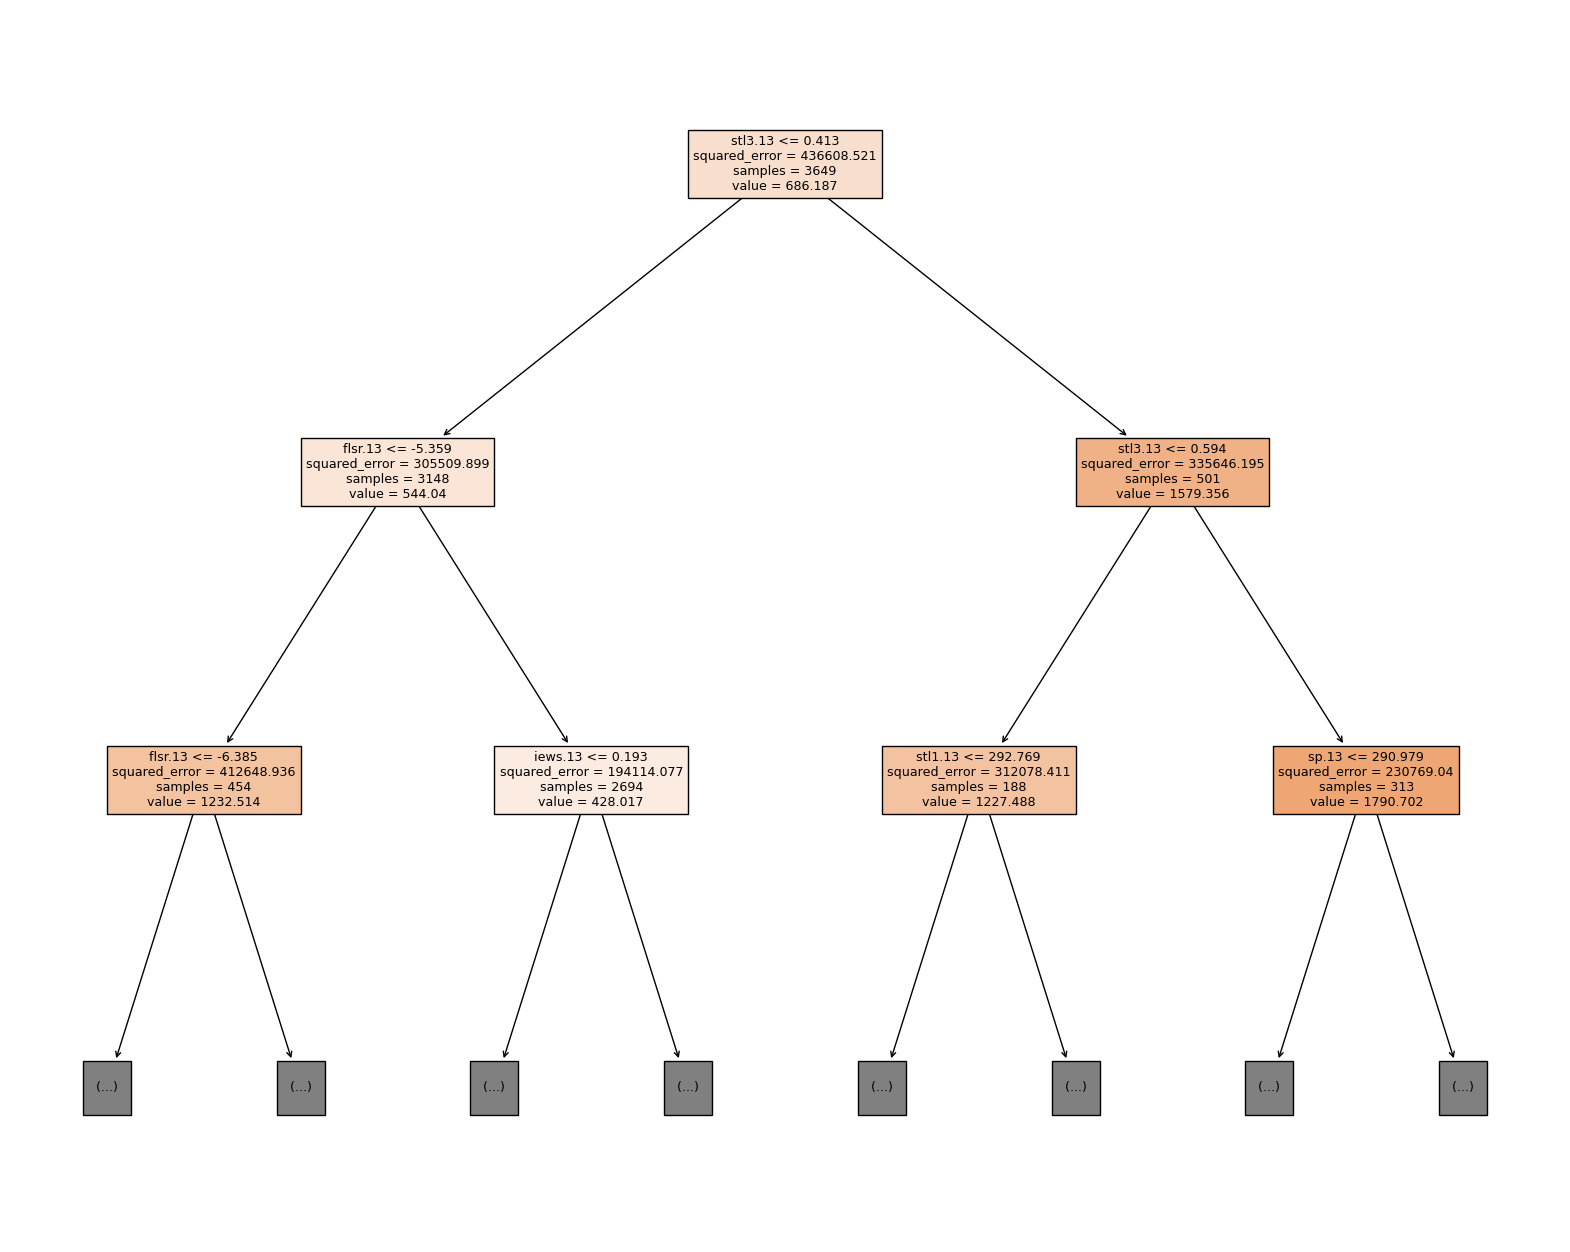

In [ ]:
from sklearn.tree import plot_tree

# Acceder al modelo de árbol de regresión dentro del pipeline
arbolito = model_arbol.named_steps['tree']

# Obtener la importancia de las características
importancias_caracteristicas = arbolito.feature_importances_

# Crear un diccionario que mapee el índice de la característica a su importancia
importancias = dict(zip(range(len(importancias_caracteristicas)), importancias_caracteristicas))

# Ordenar las características por importancia
importancias_ordenadas = sorted(importancias.items(), key=lambda x: x[1], reverse=True)

# Obtener los nombres de las características del conjunto de datos
nombres_caracteristicas = dataset.columns.tolist()

# Imprimir las características más importantes con sus nombres
print("Importancia de las características:")
for idx, importancia in importancias_ordenadas:
    nombre_caracteristica = nombres_caracteristicas[idx]
    print(f"{nombre_caracteristica}: {importancia}")


plt.figure(figsize=(20, 16))
plot_tree(arbolito, feature_names=dataset.columns.tolist(), class_names=dataset['energy'].unique().tolist(), filled=True, max_depth=2)
plt.show()

## 5. Analisis de error ##

En este apartado, se llevará a cabo un análisis del error producido en las predicciones realizadas por el modelo seleccionado respecto a los valores reales. Para ello, se comprobará tal y como se solicita en el enunciado si se producen errores mayores para niveles de energía maymás altos o más bajos.

Para lo anterior vamos a crear un *DataFrame* de Pandas, que va a contener la columna *True Labels*, que serán los valores reales de la energía para los datos de la partición de test y por otro lado *Predicted Labels*, que serán los datos de la energía predichos por nuestro modelo. Luego calcularemos la diferencia de ambas columnas y añadiremos la columna *Difference*. Por último, calcularemos el Error Relativo, dividiendo la diferencia anterior entre los valores reales de la energía.

Una vez hecho lo anterior, definiremmos el tercer cuartil de los datos reales de la energía. Utilizaremos esto para asignar a cada fila una *Label*, que será 'alta' o 'baja' en función de si los datos están por encima o por debajo de dicho cuartil.

In [ ]:
# Crear un DataFrame con y_test y y_pred_knn
results_df = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred_knn})

# Mostrar las primeras filas del DataFrame
print(results_df.head())
# Calcular la diferencia entre y_test y y_pred_knn
results_df['Difference'] = y_test - y_pred_knn

# Calcular el error relativo dividiendo la diferencia entre y_test
results_df['Relative Error'] = results_df['Difference'] / y_test

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print(results_df.head())
# Calcular el tercer cuartil de y_test
third_quartile_y_test = y_test.quantile(q=0.75)

# Definir una función para asignar los valores "alto" y "bajo"
def asignar_valor(row):
    if row['True Labels'] > third_quartile_y_test:
        return 'alto'
    else:
        return 'bajo'

# Aplicar la función a cada fila del DataFrame
results_df['Valor Asignado'] = results_df.apply(asignar_valor, axis=1)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(results_df.head())

                     True Labels  Predicted Labels
Fecha                                             
2008-01-01 00:00:00        46.00        276.174927
2008-01-01 06:00:00       948.00        277.996296
2008-01-01 12:00:00       552.74        847.507897
2008-01-01 18:00:00      1686.08        995.993362
2008-01-02 00:00:00      1186.88        961.491538
                     True Labels  Predicted Labels  Difference  Relative Error
Fecha                                                                         
2008-01-01 00:00:00        46.00        276.174927 -230.174927       -5.003803
2008-01-01 06:00:00       948.00        277.996296  670.003704        0.706755
2008-01-01 12:00:00       552.74        847.507897 -294.767897       -0.533285
2008-01-01 18:00:00      1686.08        995.993362  690.086638        0.409285
2008-01-02 00:00:00      1186.88        961.491538  225.388462        0.189900
                     True Labels  Predicted Labels  Difference  \
Fecha                   

A primera vista, cuando generamos el boxplot, vemos que la clase *baja* tiene errores relativos demasiado grandes.

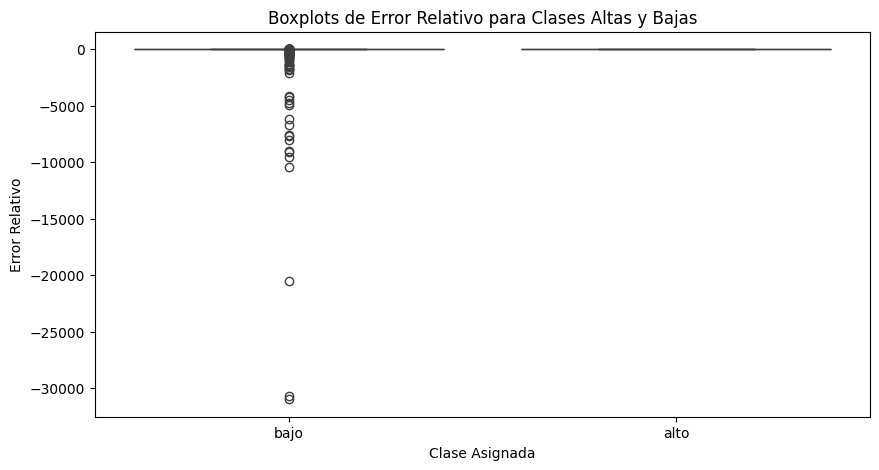

In [ ]:
# Crear los boxplots utilizando Seaborn con los errores relativos
plt.figure(figsize=(10, 5))
sns.boxplot(x='Valor Asignado', y='Relative Error', data=results_df)
plt.title('Boxplots de Error Relativo para Clases Altas y Bajas')
plt.xlabel('Clase Asignada')
plt.ylabel('Error Relativo')
plt.show()

Para poder visualizarlo mejor en el gráfico, filtraremos por aquellos errores relativos que sean mayores de -100:

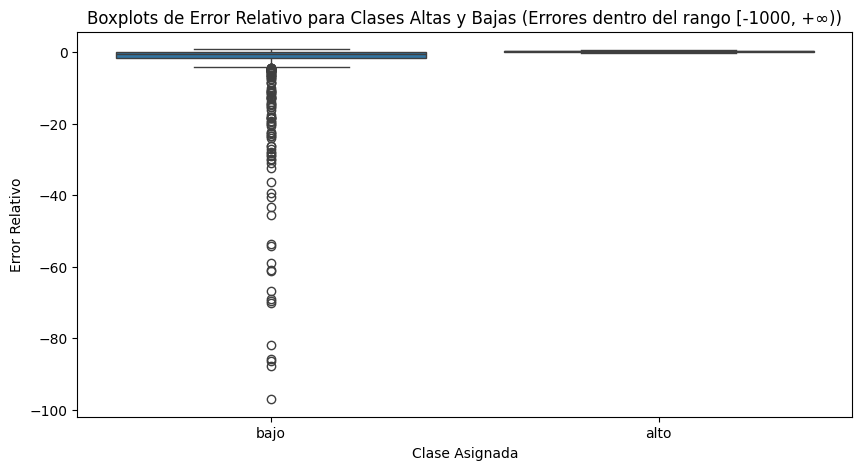

In [ ]:
# Filtrar el DataFrame para incluir solo errores relativos dentro del rango deseado
filtered_results_df = results_df[(results_df['Relative Error'] > -100)]

# Crear los boxplots utilizando Seaborn con los errores relativos filtrados
plt.figure(figsize=(10, 5))
sns.boxplot(x='Valor Asignado', y='Relative Error', data=filtered_results_df)
plt.title('Boxplots de Error Relativo para Clases Altas y Bajas (Errores dentro del rango [-1000, +∞))')
plt.xlabel('Clase Asignada')
plt.ylabel('Error Relativo')
plt.show()

Y ahora hacemos exactamente lo mismo pero para errores relativos mayores de -10:

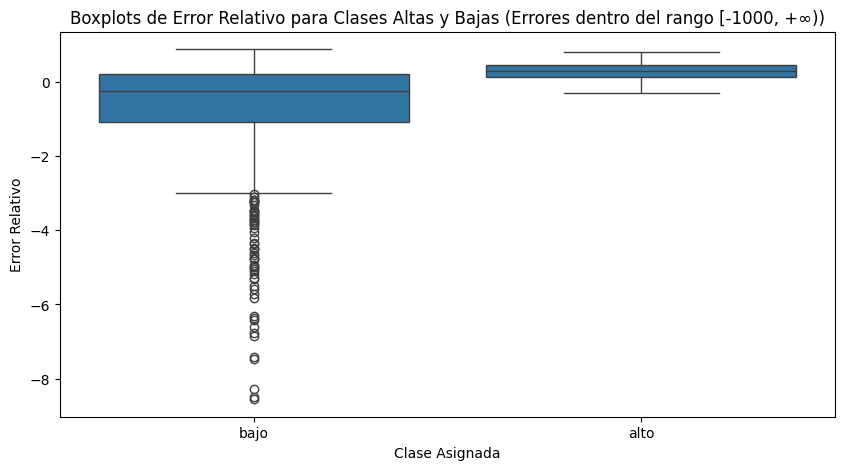

In [ ]:
# Filtrar el DataFrame para incluir solo errores relativos dentro del rango deseado
filtered_results_df = results_df[(results_df['Relative Error'] > -10)]

# Crear los boxplots utilizando Seaborn con los errores relativos filtrados
plt.figure(figsize=(10, 5))
sns.boxplot(x='Valor Asignado', y='Relative Error', data=filtered_results_df)
plt.title('Boxplots de Error Relativo para Clases Altas y Bajas (Errores dentro del rango [-1000, +∞))')
plt.xlabel('Clase Asignada')
plt.ylabel('Error Relativo')
plt.show()

Tras ver lo anterior, podemos concluir que nuestro modelo es mucho mejor para valores de energía altos que para bajos. Esto se ve en los errores relativos, dado que para clases bajas son mucho más grandes. Si imprimimos aquellos datos que tienen valores relativos más pequeños de -5000:

In [ ]:
# Filtrar el DataFrame
datos_seleccionados = results_df[results_df['Relative Error'] < -5000]

# Mostrar los datos seleccionados
print(datos_seleccionados)

                     True Labels  Predicted Labels  Difference  \
Fecha                                                            
2008-01-26 18:00:00         0.02        124.065114 -124.045114   
2008-02-22 12:00:00         0.05        456.006244 -455.956244   
2009-03-08 00:00:00         0.02        190.011747 -189.991747   
2009-04-01 12:00:00         0.06        462.278798 -462.218798   
2009-04-05 18:00:00         0.02        180.198064 -180.178064   
2009-04-20 12:00:00         0.01        309.790274 -309.780274   
2009-05-20 12:00:00         0.02        133.778841 -133.758841   
2009-06-27 12:00:00         0.04        321.951471 -321.911471   
2009-07-10 12:00:00         0.01         75.566463  -75.556463   
2009-08-24 06:00:00         0.01        204.987667 -204.977667   
2009-12-23 06:00:00         0.05        520.568750 -520.518750   
2009-12-26 12:00:00         0.01        306.964713 -306.954713   

                     Relative Error Valor Asignado  
Fecha                 

Vemos que la mayor parte de fallos cometidos por nuestro modelo es para datos en los que la energía toma valores muy bajos.

## 6. Uso de Herramientas de Inteligencia Artificial ##

Al realizar el trabajo, nos hemos ayudado de ChatGPT, que es una herramienta de Inteligencia Artificial desarrollada por OpenAI. Es capaz de comprender y generar texto en respuesta a las consultas de los usuarios. Puede ayudar en una variedad de tareas, desde responder preguntas hasta generar contenido creativo.

Veamos con mayor detenimiento en que puntos del trabajo nos ha resultado útil su uso, y en que casos se ha equivocado, dado que la información que nos proporcionaba no era lo que buscábamos:
- ChatGPT ha sido una herramienta útil a la hora de ayudarnos a descubrir funciones que inicialmente desconocíamos, especialmente en bibliotecas como *pandas*.  A pesar de lo anterior, contrastábamos la información que nos proporcionaban los notebooks que se nos proporcionaron al inicio de las clases de prácticas. Sin embargo, era una forma fácil de descubrir opciones de manera rápida.
- Inicialmente, tratamos de que nos proporcionase los posibles hiperparámetros para algunos modelos como por ejemplo para la Regresión Lineal. Sin embargo, en ocasiones, los datos que nos proporcionaba no eran correctos, ya sea por que la información estaba desactualizada o simplemente no existían dichos hiperparámetros. Por ello, dejamos de lado ChatGPT en este aspecto, y utilizamos el manual de *sklearn*. A continuación vemos como en una de las consultas nos sugirió el hiperparámetro *normalize*, el cuál no existe.
```
# Crear el modelo de regresión lineal
linear_model = LinearRegression()
# Definir los hiperparámetros que deseas explorar con GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}
```
- También nos resultaba muy útil cuando obteníamos errores en el código y no localizábamos el error. En muchas ocasiones, le pasábamos el código que teníamos y el error que nos devolvía, y nos ayudaba a solucionarlo o al menos a identificar qué era lo que estaba desencadenando dicho error.
- Por último, nos facilitó en muchas ocasiones a entender ciertas situaciones, sobre todo con temas relacionados con las particiones, o a la hora de interpretar los resultados obtenidos. Evidentemente, siendo contrastado y complementado con la teoría de la asignatura y las indicaciones de las sesiones prácticas.

